# Aplicación de la regresión logística

**Nombre**: Rasshid Ortiz Rodríguez

En este Notebook se mostrará una aplicación de la regresión logística usando gradiente descendente y gradiente descendente estocástico, este último usando 2 versiones. La implementación es propia.

## Conjunto de datos:
Se utilizará un conjunto de datos de una aerolínea con más de 130,000 datos, es una encuesta a los pasajeros sobre la satisfacción del uso de dicha aerolínea. ¿Qué factores están correlacionados con la satisfacción de los pasajeros? Intentaremos predecir la satisfacción de los pasajeros teniendo en cuenta esta pregunta.
Sobre el contenido: \\
+ Gender: Gender of the passengers (Female, Male)

+ Customer Type: The customer type (Loyal customer, disloyal customer)

+ Age: The actual age of the passengers

+ Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

+ Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

+ Flight distance: The flight distance of this journey

+ Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

+ Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

+ Ease of Online booking: Satisfaction level of online booking

+ Gate location: Satisfaction level of Gate location

+ Food and drink: Satisfaction level of Food and drink

+ Online boarding: Satisfaction level of online boarding

+ Seat comfort: Satisfaction level of Seat comfort

+ Inflight entertainment: Satisfaction level of inflight entertainment

+ On-board service: Satisfaction level of On-board service

+ Leg room service: Satisfaction level of Leg room service

+ Baggage handling: Satisfaction level of baggage handling

+ Check-in service: Satisfaction level of Check-in service

+ Inflight service: Satisfaction level of inflight service

+ Cleanliness: Satisfaction level of Cleanliness

+ Departure Delay in Minutes: Minutes delayed when departure

+ Arrival Delay in Minutes: Minutes delayed when Arrival

+ Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

Importaremos las librerías a utilizar

In [1]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importamos el conjunto de datos

In [2]:
#importar drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


El dataset ya viene separado en conjunto de prueba y entrenamiento

Importamos primero el de entrenamiento

In [3]:
#importar conjunto de entrenamiento
# Cargar el archivo CSV en un DataFrame
df_airline_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Temas_selectos_computacion/train.csv')
# Mostrar las primeras filas del DataFrame
df_airline_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
#mapear a etiquetas numéricas y enteras las columnas  customer type,  gender, type of travel y class
df_airline_train['Type of Travel'] = df_airline_train['Type of Travel'].map({'Personal Travel':0,'Business Travel':1})
df_airline_train['Class'] = df_airline_train['Class'].map({'Business':0,'Eco':1,'Eco Plus':2})
df_airline_train['Gender'] = df_airline_train['Gender'].map({'Female':0,'Male':1})
df_airline_train['Customer Type'] = df_airline_train['Customer Type'].map({'Loyal Customer':0,'disloyal Customer':1})


In [5]:
#mapear a etiquetas numéricas la columa de satisfacción
df_airline_train['satisfaction'] = df_airline_train['satisfaction'].map({'neutral or dissatisfied':0,'satisfied':1})

Ahora importamos el de prueba

In [6]:
# importar conjunto de prueba

# Cargar el archivo CSV en un DataFrame
df_airline_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Temas_selectos_computacion/test.csv')

# Mostrar las primeras filas del DataFr
df_airline_test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [7]:
df_airline_test['Class'] = df_airline_test['Class'].map({'Business':0,'Eco':1,'Eco Plus':2})
#mapear a etiquetas numéricas la columa de satisfacción
df_airline_test['satisfaction'] = df_airline_test['satisfaction'].map({'neutral or dissatisfied':0,'satisfied':1})

## Análisis de los datos

In [8]:
#Tamaño
df_airline_train.shape, df_airline_test.shape

((103904, 25), (25976, 25))

In [9]:
# Describe train
df_airline_train.describe()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,32249.0,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000,103904.000000
mean,51951.500000,64924.210502,0.492541,0.182678,39.379706,0.0,0.594135,1189.448375,2.729683,3.060296,...,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678,0.433333
std,29994.645522,37463.812252,0.499947,0.386404,15.114964,0.0,0.620799,997.147281,1.327829,1.525075,...,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682,0.495538
min,0.000000,1.000000,0.000000,0.000000,7.000000,0.0,0.000000,31.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,0.000000,0.000000,27.000000,0.0,0.000000,414.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,51951.500000,64856.500000,0.000000,0.000000,40.000000,0.0,1.000000,843.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,77927.250000,97368.250000,1.000000,0.000000,51.000000,0.0,1.000000,1743.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,103903.000000,129880.000000,1.000000,1.000000,85.000000,0.0,2.000000,4983.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


In [10]:
# describe test
df_airline_test.describe()

,Unnamed: 0,id,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,...,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000,25976.000000
mean,12987.500000,65005.657992,39.620958,0.592778,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,...,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857,0.438982
std,7498.769632,37611.526647,15.135685,0.623703,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,...,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539,0.496272
min,0.000000,17.000000,7.000000,0.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,6493.750000,32170.500000,27.000000,0.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000,0.000000
50%,12987.500000,65319.500000,40.000000,1.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000,0.000000
75%,19481.250000,97584.250000,51.000000,1.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000,1.000000
max,25975.000000,129877.000000,85.000000,2.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000,1.000000


In [11]:
# info train
df_airline_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  int64  
 3   Customer Type                      103904 non-null  int64  
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     32249 non-null   float64
 6   Class                              103904 non-null  int64  
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [12]:
# info test
df_airline_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  int64  
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

Veamos la correlación de las variables


<Axes: >

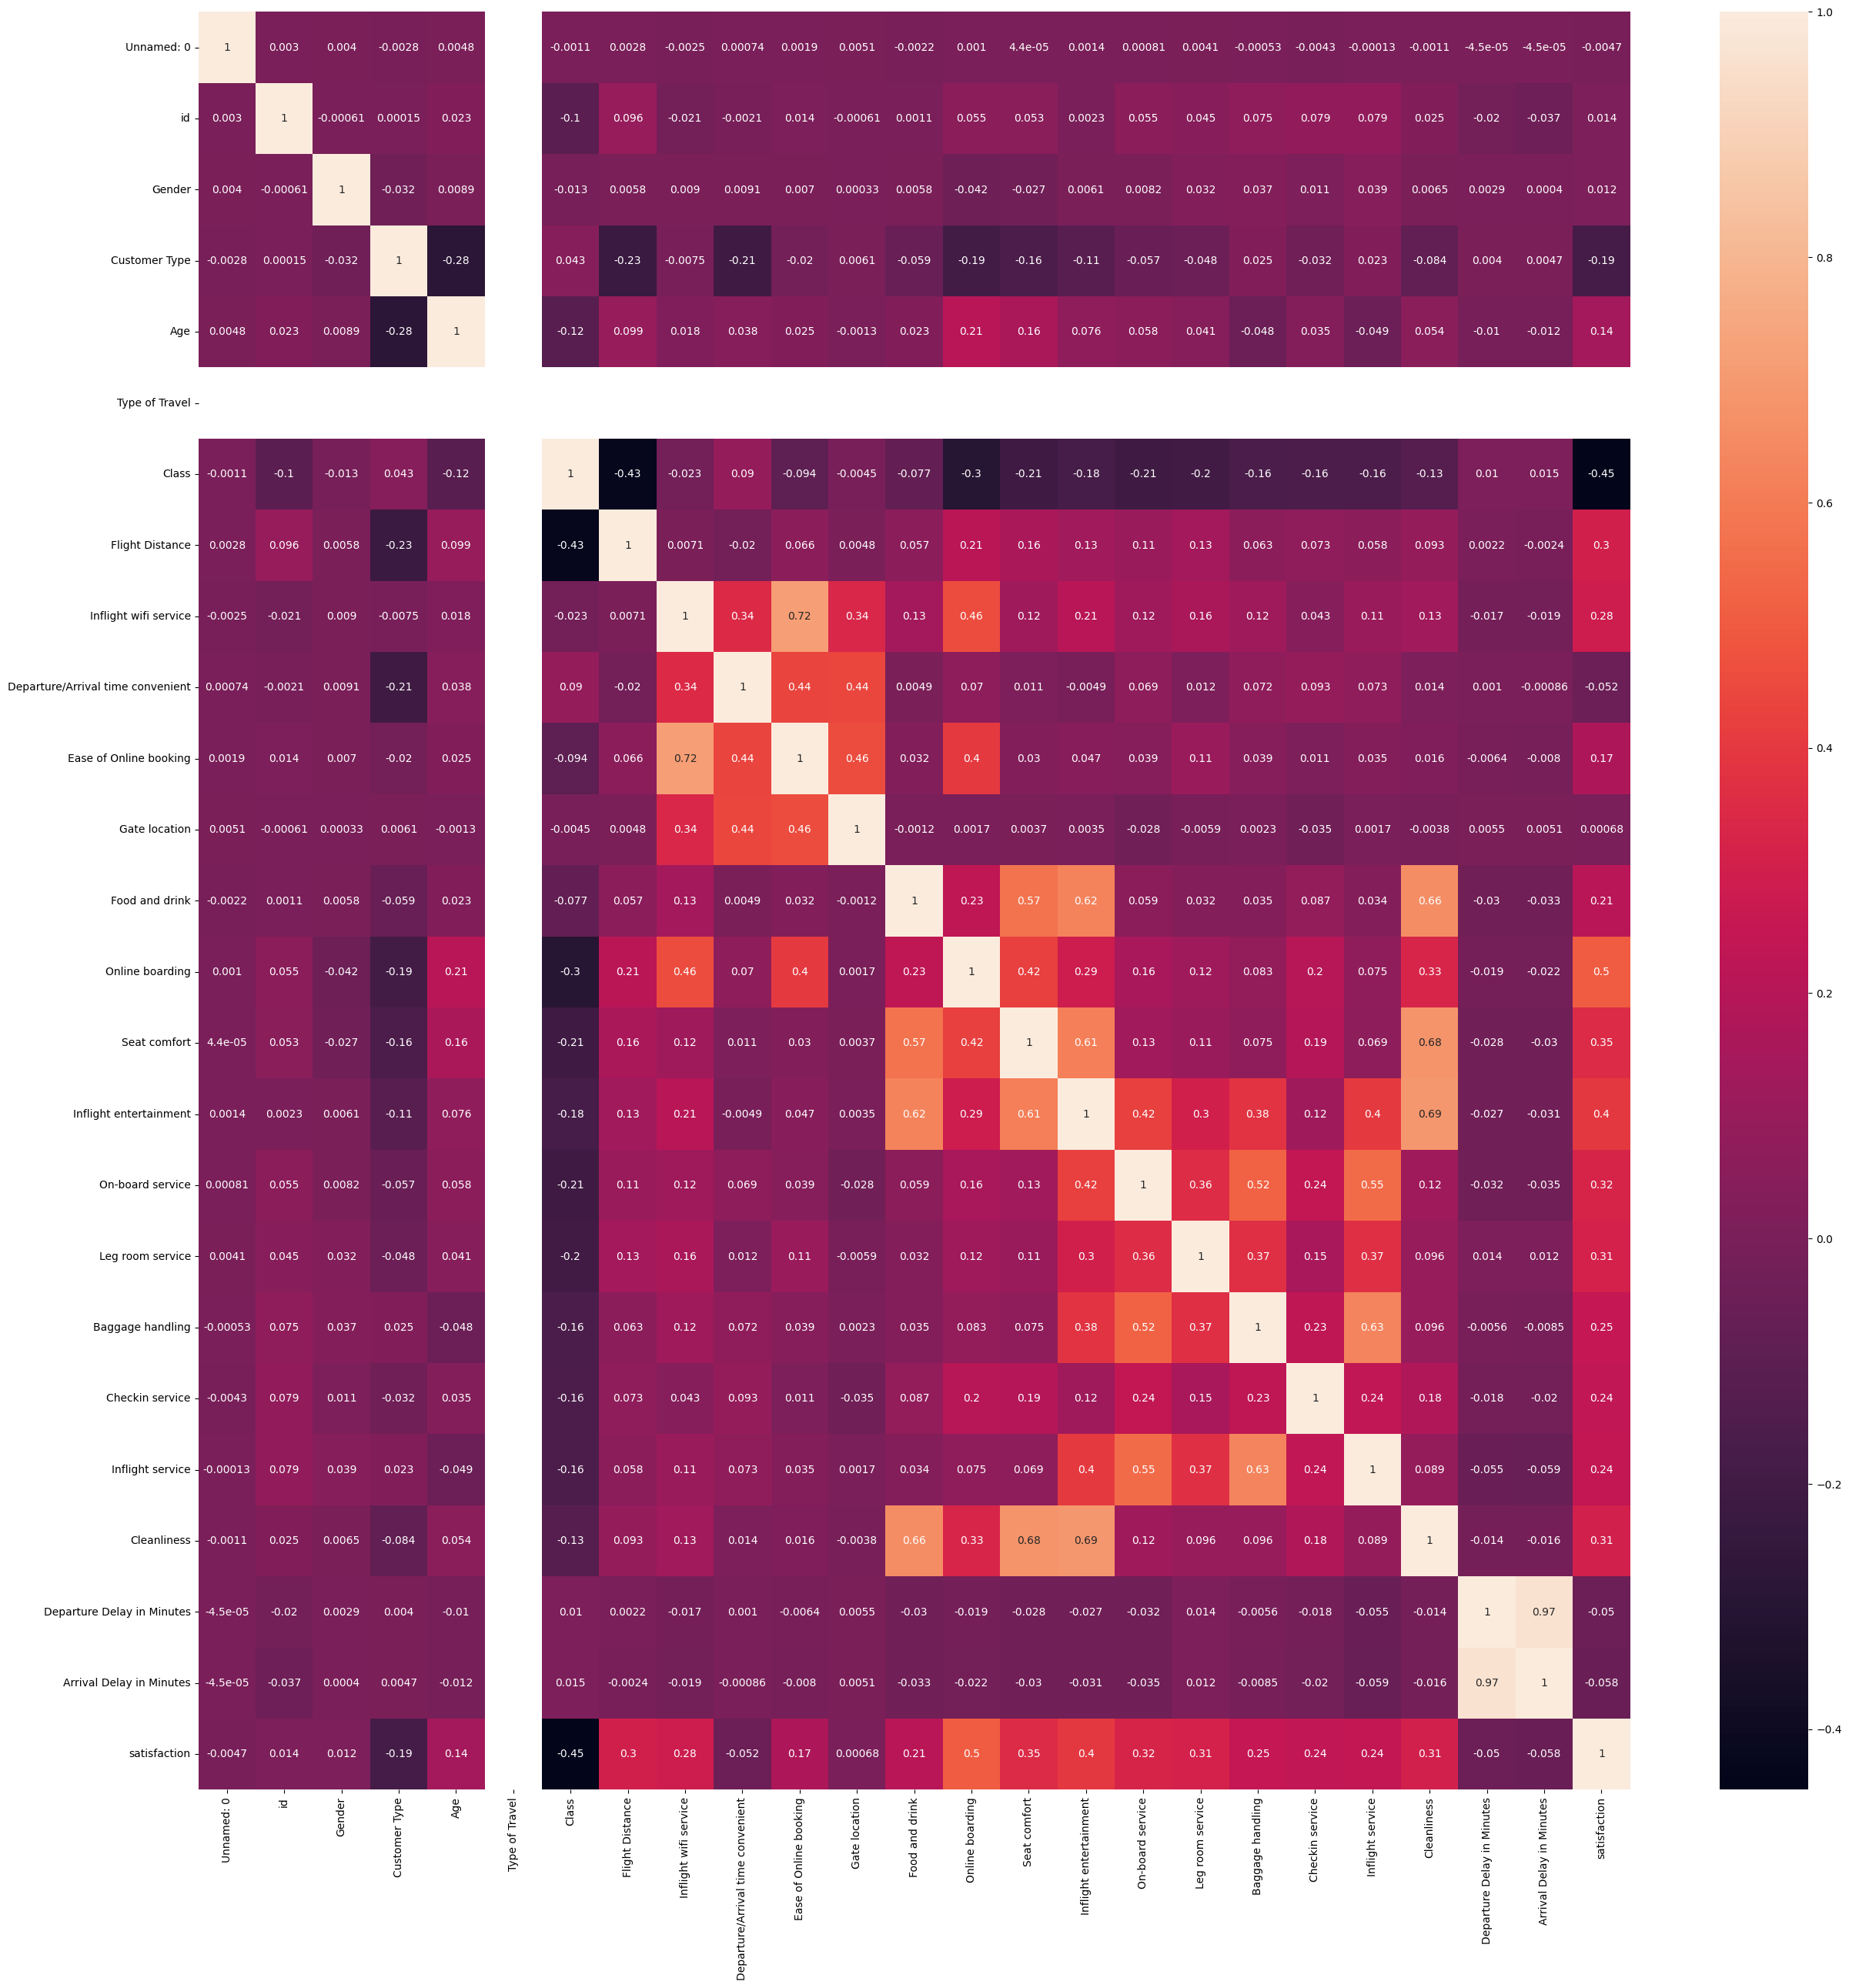

In [13]:
#mostrar matriz de correlación completa y en grande
plt.figure(figsize=(30,30))
sns.heatmap(df_airline_train.corr(),annot=True)



Para efectos prácticos seleccionaremos las 4 variables más correlacionadas para entrenar nuestro modelo las cuales son "Online boarding", "inflight entertainment", "class", "seat comfort". Siendo estas las más correlacionadas con la satisfacción de un pasajero.

## Funciones

Regresión logística usando gradiente descendente estocástico v1

In [14]:
#regresion lineal multiple
def regress_mul(X,w):
  return np.dot(X,w[1:]) + w[0]
#funcion sigmoide
def sigmoid(z):
    """Función sigmoide."""
    return 1 / (1 + np.exp(np.clip(-z,-250,250)))
#funcion que separa en lotes a X e y
def lote_X_y(X,y,n,size=1):
      if size > n:
             size=n
      idx=np.random.choice(n,size,replace=False)
      return size, X[idx],y[idx]
#Minimizar la funcion de costos
def fit_Logit_estoch(X, y, w, alpha, epochs,size=1):
    cost = np.zeros(epochs)
    m = len(y)  # Número de muestras

    for i in range(epochs):
        # seleccionar un lote de datos
        n_batch, lote_x, lote_y = lote_X_y(X, y, m, size)
        z = regress_mul(lote_x, w)
        phi = sigmoid(z)
        errors = phi - lote_y  # Calcular los errores como la diferencia entre la predicción y la verdad

        #Minimizar funcion de costos (entropía cruzada) usando el descenso del gradiente estocástico

        w[1:] -= alpha * (1/n_batch) * np.dot(lote_x.T, errors)  # Actualizar pesos
        w[0] -= alpha * (1/n_batch) * np.sum(errors)        # Actualizar el sesgo

        # Calcular la función de costo (log-verosimilitud negativa)
        phi=sigmoid(regress_mul(X,w)) #actualizar phi
        cost[i] = -np.mean(y * np.log(phi) + (1 - y) * np.log(1 - phi))

    return w, cost
#funcion de prediccion binaria
def predict(X, w):
    z = regress_mul(X, w)
    phi = sigmoid(z)
    return (phi >= 0.5).astype(int)

Regresión logística con gradiente descendente

In [15]:
def regressLin(X,w):
    z = np.dot(X,w[1:]) + w[0]
    return z

# función sigmoide
def sigmoid(z):
    phi_z = 1.0 / (1.0 + np.exp(-np.clip(z,-250,250)))
    return phi_z

 # predicción de la regresión logística
def predictLogic(X, w):
    z = regressLin(X,w)
    y_pred = np.where(z>=0.0,1,0)
    return y_pred

# función de costo entropía cruzada
def costLogic(y, phi_z):
    n = len(y)
    loss = -(1/n)* ( np.sum( y*np.log(phi_z) + (1-y)*np.log(1-phi_z) ) )
    return loss
# regresión logística con descenso del gradiente
def fitLogic(X,y,w,alpha,epochs):

    loss = np.zeros(epochs)
    n = len(X)                     # cantidad de datos

    for i in range(epochs):
        # calcular el valor de la predicción
        z = regressLin(X,w)
        phi_z = sigmoid(z)

        # derivadas parciales
        error = (phi_z - y)
        dw0 = np.sum(error)/n        # dJ/dw0
        dwj = np.dot(X.T,error)/n    # dJ/dwj

        # actualizar los pesos usando el gradiente descendente
        w[0]  = w[0]  - alpha*dw0
        w[1:] = w[1:] - alpha*dwj

        # actualizar el valor del costo logístico
        loss[i] = costLogic(y, phi_z)

    return w, loss

Regresión logística usando gradiente descendente estocástico v2

In [16]:
#funcion para obtener lotes del mismo tamaño
def getBatch(len_x, batch_size):
  idx=np.arange(len_x)
  #revolver índices
  np.random.shuffle(idx)
  return len_x//batch_size, idx
#Minimizar la funcion de costos
def fit_Logit_estoch_new(X, y, w, alpha, epochs,num_batch):
    cost = np.zeros(epochs)
    m = len(y)  # Número de muestras
    batch_size,idx=getBatch(m, num_batch)
    for i in range(epochs):
      for k in range(num_batch):
        X_batch, y_batch = X[k*batch_size:(k+1)*batch_size], y[k*batch_size:(k+1)*batch_size]
        z = regress_mul(X_batch, w)
        phi = sigmoid(z)
        errors = phi - y_batch  # Calcular los errores como la diferencia entre la predicción y la verdad

        #Minimizar funcion de costos (entropía cruzada) usando el descenso del gradiente estocástico

        w[1:] -= alpha * (1/batch_size) * np.dot(X_batch.T, errors)  # Actualizar pesos
        w[0] -= alpha * (1/batch_size) * np.sum(errors)        # Actualizar el sesgo

      # Calcular la función de costo (log-verosimilitud negativa)
      phi=sigmoid(regress_mul(X,w)) #actualizar phi
      cost[i] = -np.mean(y * np.log(phi) + (1 - y) * np.log(1 - phi))

    return w, cost

## Extraer valores numéricos

In [17]:
# Extraer valores de las columnas "Online boarding", "inflight entertainment", "class", "seat comfort"
X_train = df_airline_train[['Online boarding', 'Inflight entertainment', 'Class', 'Seat comfort']].values
y_train = df_airline_train['satisfaction'].values

In [18]:
# hacer lo mismo para el conjunto de prueba
X_test = df_airline_test[['Online boarding', 'Inflight entertainment', 'Class', 'Seat comfort']].values
y_test = df_airline_test['satisfaction'].values

In [19]:
X_train

array([[3, 5, 2, 5],
       [3, 1, 0, 1],
       [5, 5, 0, 5],
       ...,
       [1, 4, 0, 5],
       [1, 1, 1, 1],
       [1, 1, 0, 1]])

In [20]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((103904, 4), (103904,), (25976, 4), (25976,))

Estandarizar los datos

In [21]:
# función que realiza el escalado estándar
def escEstandar(X_data):
    X_norm = np.zeros_like(X_data)
    X_mean = np.mean(X_data, axis=0)      # media de las columnas
    X_std  = np.std(X_data, axis=0)       # desviación estándar de las columnas
    X_norm = (X_data - X_mean)/X_std      # escalar datos

    return X_norm

In [22]:
#Estandarizar los datos
X_train = escEstandar(X_train)
X_test = escEstandar(X_test)

In [23]:
X_train

array([[-0.1855316 ,  1.23170428,  2.26461832,  1.18309931],
       [-0.1855316 , -1.76908125, -0.95705413, -1.84931453],
       [ 1.29649608,  1.23170428, -0.95705413,  1.18309931],
       ...,
       [-1.66755928,  0.4815079 , -0.95705413,  1.18309931],
       [-1.66755928, -1.76908125,  0.65378209, -1.84931453],
       [-1.66755928, -1.76908125, -0.95705413, -1.84931453]])

## Regresión logística usando gradiente descendente

Establecer parámetros

In [24]:
#establecer parámetros
epochs = 1000
alpha = 0.001
#inicializamos los pesos
rgen = np.random.RandomState(1)
w0 = rgen.normal(loc=0.0, scale=0.01,size=1 + X_train.shape[1])

In [25]:
w,loss=fitLogic(X_train,y_train,w0,alpha,epochs)

In [26]:
loss,w

(array([0.69296293, 0.69277868, 0.6925946 , 0.69241071, 0.69222698,
        0.69204344, 0.69186007, 0.69167687, 0.69149386, 0.69131101,
        0.69112835, 0.69094585, 0.69076354, 0.6905814 , 0.69039943,
        0.69021764, 0.69003602, 0.68985458, 0.68967331, 0.68949221,
        0.68931129, 0.68913054, 0.68894997, 0.68876957, 0.68858934,
        0.68840928, 0.6882294 , 0.68804969, 0.68787015, 0.68769078,
        0.68751159, 0.68733257, 0.68715372, 0.68697504, 0.68679653,
        0.68661819, 0.68644003, 0.68626203, 0.68608421, 0.68590656,
        0.68572907, 0.68555176, 0.68537462, 0.68519764, 0.68502084,
        0.68484421, 0.68466774, 0.68449144, 0.68431532, 0.68413936,
        0.68396357, 0.68378795, 0.68361249, 0.68343721, 0.68326209,
        0.68308714, 0.68291236, 0.68273775, 0.6825633 , 0.68238902,
        0.68221491, 0.68204096, 0.68186718, 0.68169356, 0.68152012,
        0.68134684, 0.68117372, 0.68100077, 0.68082799, 0.68065537,
        0.68048291, 0.68031062, 0.6801385 , 0.67

In [27]:
#costo mínimo
print(loss.min())

0.5729859333419833


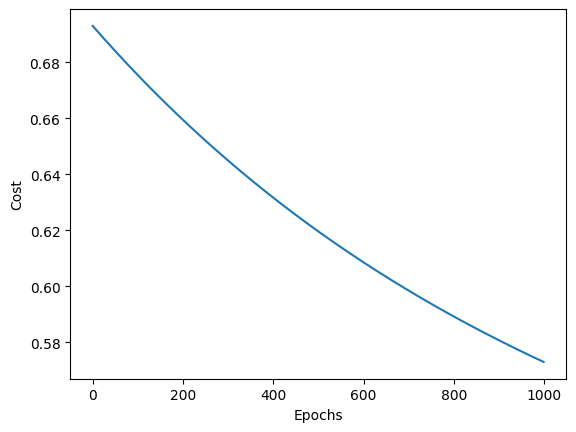

In [28]:
#Graficar
plt.plot(range(epochs), loss)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()

Predicciones

In [29]:
# hacer las predicciones
y_pred = predictLogic(X_test, w)

In [30]:
#Evaluar predicciones
from sklearn.metrics import accuracy_score

In [31]:
# accuracy
accuracy_score(y_test, y_pred)

0.7840699106867878

## Regresión logística usando gradiente descendente estocástico v1

In [32]:
#establecer parámetros
epochs = 1000
alpha = 0.001
#inicializamos los pesos
rgen = np.random.RandomState(1)
w0 = rgen.normal(loc=0.0, scale=0.01,size=1 + X_train.shape[1])
size=100

In [33]:
w,loss=fit_Logit_estoch(X_train, y_train, w0, alpha, epochs,size)

In [34]:
loss,w

(array([0.69277707, 0.69257647, 0.6923996 , 0.6921736 , 0.69199287,
        0.69184677, 0.69166988, 0.69152684, 0.69131962, 0.69113664,
        0.69092196, 0.69075659, 0.69057113, 0.69039886, 0.69018819,
        0.68998232, 0.6897862 , 0.68957961, 0.6893926 , 0.68921457,
        0.68905739, 0.68889294, 0.68870222, 0.68851488, 0.68830192,
        0.68814214, 0.68798088, 0.68778258, 0.68756173, 0.68737661,
        0.68717566, 0.68701865, 0.68684157, 0.68667352, 0.68653061,
        0.68634722, 0.68617692, 0.68599136, 0.68585664, 0.68571473,
        0.68554734, 0.68537347, 0.68524041, 0.68507525, 0.68494905,
        0.68479311, 0.68464394, 0.68447666, 0.68430769, 0.68412119,
        0.68392333, 0.68375672, 0.68356037, 0.68340223, 0.68324468,
        0.68307088, 0.68287525, 0.68271494, 0.68252772, 0.6823327 ,
        0.68218419, 0.68204469, 0.68189211, 0.68170754, 0.68159415,
        0.68143507, 0.68125476, 0.68110592, 0.68094211, 0.68080629,
        0.68066194, 0.68048846, 0.68029828, 0.68

In [35]:
#costo mínimo
print(loss.min())

0.5728824994942423


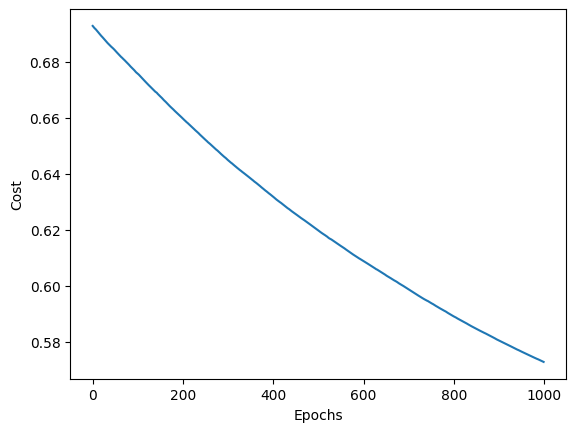

In [36]:
#Graficar
plt.plot(range(epochs), loss)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()

In [37]:
# hacer las predicciones
y_pred = predictLogic(X_test, w)

In [38]:
# accuracy
accuracy_score(y_test, y_pred)

0.7838774253156761

## Regresión logística usando descenso del gradiente v2

In [53]:
#establecer parámetros
epochs = 1000
alpha = 0.001
#inicializamos los pesos
rgen = np.random.RandomState(1)
w0 = rgen.normal(loc=0.0, scale=0.01,size=1 + X_train.shape[1])
num_batch=10

In [54]:
w,loss= fit_Logit_estoch_new(X_train, y_train, w0, alpha, epochs,num_batch)

In [ ]:
loss,w

In [56]:
# costo minimo
print(loss.min())

0.4458350692904366


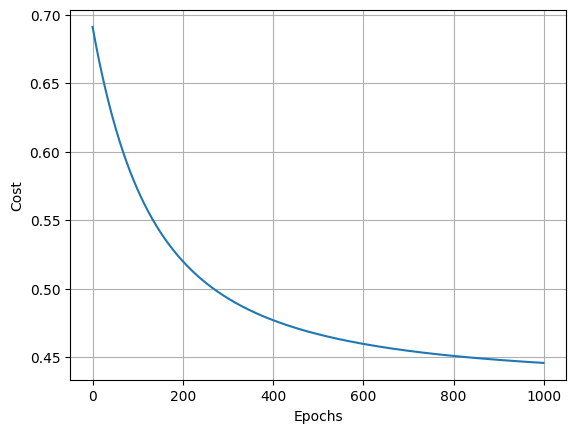

In [57]:
#Graficar
plt.plot(range(epochs), loss)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.grid()
plt.show()

In [58]:
# hacer las predicciones
y_pred = predictLogic(X_test, w)

In [59]:
# accuracy
accuracy_score(y_test, y_pred)

0.8110563597166616

# validación cruzada